# Feature Engineering on recommendations.csv
### Author: Alia and Jian Sheng

reading csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [2]:
# Move up one level from 'notebooks/' to the project root
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Define file paths
recommendations_path = os.path.join(BASE_DIR, "data/raw/recommendations.csv")

# Load CSV files into Pandas DataFrames
recommendations_pd = pd.read_csv(recommendations_path) if os.path.exists(recommendations_path) else None
recommendations_pd_copy = recommendations_pd.copy()

1. Log Transformation for **hours**

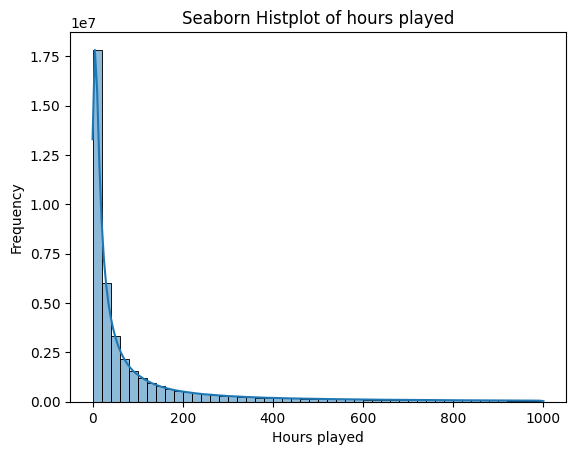

In [3]:
sns.histplot(recommendations_pd['hours'], bins=50, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of hours played') # Title
plt.xlabel('Hours played') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

- right skewed
- applying log 

In [4]:
# Apply log1p for log transformation; handles zero prices and improves numerical stability for small prices.
recommendations_pd['hours_log'] = recommendations_pd['hours'].apply(np.log1p)

# Comparison Before After log
print(recommendations_pd[['hours', 'hours_log']].head())


   hours  hours_log
0   36.3   3.618993
1   11.5   2.525729
2  336.5   5.821566
3   27.4   3.346389
4    7.9   2.186051


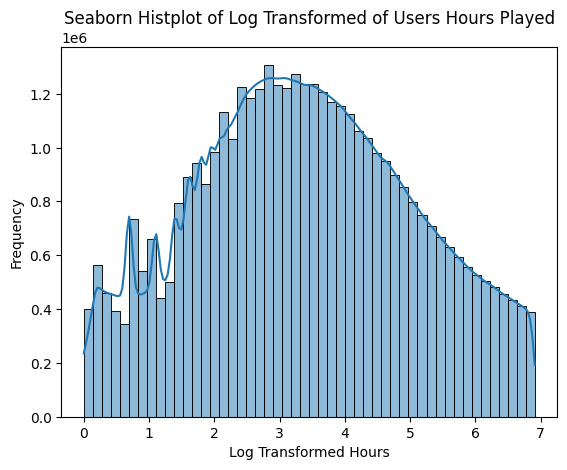

In [5]:
sns.histplot(recommendations_pd['hours_log'], bins=50, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of Log Transformed of Users Hours Played') # Title
plt.xlabel('Log Transformed Hours') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

In [6]:
recommendations_pd.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_log
0,975370,0,0,2022-12-12,True,36.3,51580,0,3.618993
1,304390,4,0,2017-02-17,False,11.5,2586,1,2.525729
2,1085660,2,0,2019-11-17,True,336.5,253880,2,5.821566
3,703080,0,0,2022-09-23,True,27.4,259432,3,3.346389
4,526870,0,0,2021-01-10,True,7.9,23869,4,2.186051


In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler_hours_log = StandardScaler() # Initialize StandardScaler

# **Important: Fit and transform ONLY on the 'hours_log' column**
recommendations_pd['hours_log_scaled'] = scaler_hours_log.fit_transform(recommendations_pd[['hours_log']])

# Now you have a new column 'hours_log_scaled' with the scaled values
print(recommendations_pd[['hours_log', 'hours_log_scaled']].head())

   hours_log  hours_log_scaled
0   3.618993          0.137106
1   2.525729         -0.520482
2   5.821566          1.461930
3   3.346389         -0.026863
4   2.186051         -0.724794


2. Binary transformation for **is_recommended** to **is_recommended_binary**
- changing from True/False to 1/0

In [8]:
# Convert is_recommended to 0 and 1
recommendations_pd['is_recommended_binary'] = recommendations_pd['is_recommended'].astype(int)
print(recommendations_pd['is_recommended_binary'].unique())
# Check the result
print(recommendations_pd[['is_recommended','is_recommended_binary']].head(5))

[1 0]
   is_recommended  is_recommended_binary
0            True                      1
1           False                      0
2            True                      1
3            True                      1
4            True                      1


In [9]:
recommendations_pd.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_log,hours_log_scaled,is_recommended_binary
0,975370,0,0,2022-12-12,True,36.3,51580,0,3.618993,0.137106,1
1,304390,4,0,2017-02-17,False,11.5,2586,1,2.525729,-0.520482,0
2,1085660,2,0,2019-11-17,True,336.5,253880,2,5.821566,1.461930,1
3,703080,0,0,2022-09-23,True,27.4,259432,3,3.346389,-0.026863,1
4,526870,0,0,2021-01-10,True,7.9,23869,4,2.186051,-0.724794,1


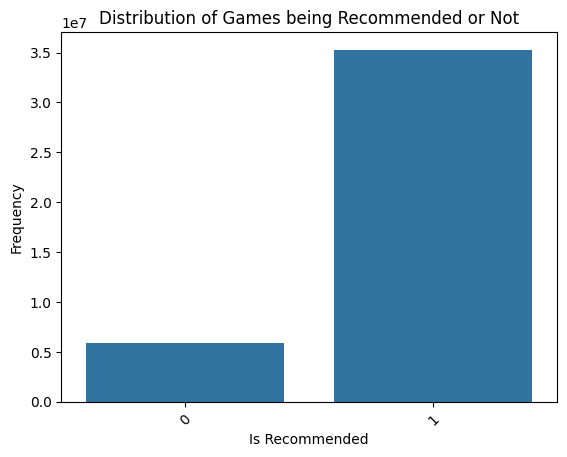

In [10]:
sns.countplot(data=recommendations_pd, x='is_recommended_binary')
plt.title('Distribution of Games being Recommended or Not')
plt.xlabel('Is Recommended')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [11]:
recommendations_pd.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_log,hours_log_scaled,is_recommended_binary
0,975370,0,0,2022-12-12,True,36.3,51580,0,3.618993,0.137106,1
1,304390,4,0,2017-02-17,False,11.5,2586,1,2.525729,-0.520482,0
2,1085660,2,0,2019-11-17,True,336.5,253880,2,5.821566,1.461930,1
3,703080,0,0,2022-09-23,True,27.4,259432,3,3.346389,-0.026863,1
4,526870,0,0,2021-01-10,True,7.9,23869,4,2.186051,-0.724794,1


3. Extracting **Date** feature
- getting the Year, Month and Day of the review

In [12]:
recommendations_pd['review_year'] = pd.to_datetime(recommendations_pd['date']).dt.year # Extract year from 'date_release' and create 'release_year' column
recommendations_pd['review_month'] = pd.to_datetime(recommendations_pd['date']).dt.month # Extract month from 'date_release' and create 'release_month' column
recommendations_pd['review_day'] = pd.to_datetime(recommendations_pd['date']).dt.day # Extract day from 'date_release' and create 'release_day' column

recommendations_pd[['date', 'review_year','review_month','review_day']].head()

,date,review_year,review_month,review_day
0,2022-12-12,2022,12,12
1,2017-02-17,2017,2,17
2,2019-11-17,2019,11,17
3,2022-09-23,2022,9,23
4,2021-01-10,2021,1,10


In [13]:
reference_date = pd.to_datetime('2025-01-01') # Define a reference date (early 2025)

recommendations_pd['review_age_years'] = (reference_date - pd.to_datetime(recommendations_pd['date'])).dt.days / 365.25 # Calculate game age in years

recommendations_pd[['date', 'review_year', 'review_age_years']].head()

,date,review_year,review_age_years
0,2022-12-12,2022,2.056126
1,2017-02-17,2017,7.871321
2,2019-11-17,2019,5.125257
3,2022-09-23,2022,2.275154
4,2021-01-10,2021,3.975359


In [14]:
recommendations_pd.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_log,hours_log_scaled,is_recommended_binary,review_year,review_month,review_day,review_age_years
0,975370,0,0,2022-12-12,True,36.3,51580,0,3.618993,0.137106,1,2022,12,12,2.056126
1,304390,4,0,2017-02-17,False,11.5,2586,1,2.525729,-0.520482,0,2017,2,17,7.871321
2,1085660,2,0,2019-11-17,True,336.5,253880,2,5.821566,1.461930,1,2019,11,17,5.125257
3,703080,0,0,2022-09-23,True,27.4,259432,3,3.346389,-0.026863,1,2022,9,23,2.275154
4,526870,0,0,2021-01-10,True,7.9,23869,4,2.186051,-0.724794,1,2021,1,10,3.975359


4. Added **helpfulness ratio**
- it provides a more informative and normalized measure of how useful a review is, rather than just using the raw helpful count.
- if helpfulness_ratio < 0.5, review may not be serious
- if helpfulness_ratio > 0.5, review is helpful to others
- People took time to decide whether this specific review is helpful

to illustrate, 

| Helpful | Funny | Helpfulness Ratio |
|---------|-------|------------------|
| 10      | 0     | 10 / (10+0+1) = 0.91 |
| 100     | 0     | 100 / (100+0+1) = 0.99 |
| 1000    | 0     | 1000 / (1000+1) = 0.999 |
| 10      | 10    | 10 / (10+10+1) = 0.476 |
| 5       | 20    | 5 / (5+20+1) = 0.192 |


In [15]:
recommendations_pd['helpfulness_ratio'] = recommendations_pd['helpful'] / (recommendations_pd['helpful'] + recommendations_pd['funny'] + 1)
print(recommendations_pd[['helpful', 'funny', 'helpfulness_ratio']].head())

   helpful  funny  helpfulness_ratio
0        0      0           0.000000
1        4      0           0.800000
2        2      0           0.666667
3        0      0           0.000000
4        0      0           0.000000


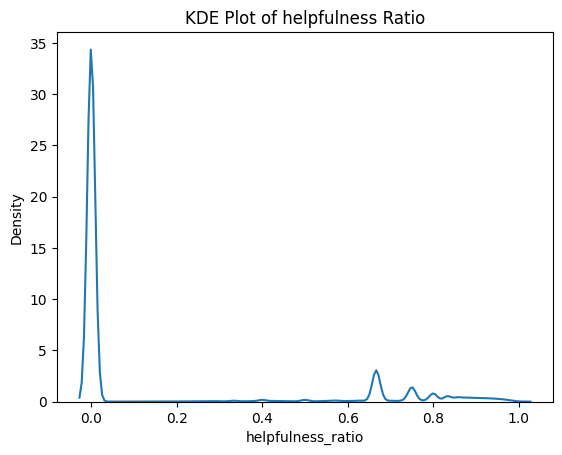

In [16]:
sns.kdeplot(recommendations_pd['helpfulness_ratio']) # Create KDE plot for 'positive_ratio_per_dollar'
plt.title('KDE Plot of helpfulness Ratio') # Set plot title
plt.xlabel('helpfulness_ratio') # X-axis label
plt.ylabel('Density') # Y-axis label
plt.show() # Show the plot

## Log transform 'helpful' and 'funny' column

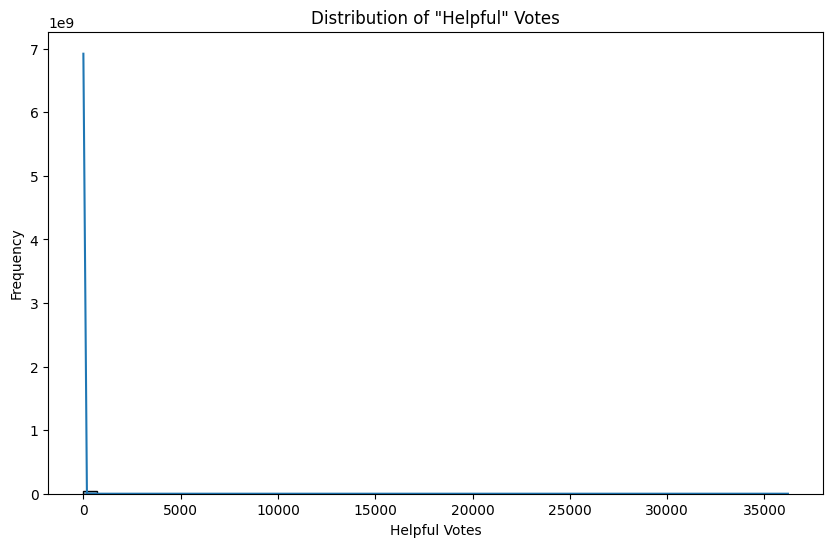

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust figure size if needed
sns.histplot(recommendations_pd['helpful'], bins=50, kde=True) # Histogram with KDE
plt.title('Distribution of "Helpful" Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6)) # Adjust figure size if needed
sns.histplot(recommendations_pd['funny'], bins=50, kde=True) # Histogram with KDE
plt.title('Distribution of "Funny" Votes')
plt.xlabel('Funny Votes')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Log transform 'helpful' and 'funny' column
recommendations_pd['helpful_log'] = recommendations_pd['helpful'].apply(np.log1p)
recommendations_pd['funny_log'] = recommendations_pd['funny'].apply(np.log1p)

print(recommendations_pd[['helpful', 'helpful_log', 'funny', 'funny_log']].head())

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust figure size if needed
sns.histplot(recommendations_pd['helpful_log'], bins=50, kde=True) # Histogram with KDE
plt.title('Distribution of "Helpful" Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6)) # Adjust figure size if needed
sns.histplot(recommendations_pd['funny_log'], bins=50, kde=True) # Histogram with KDE
plt.title('Distribution of "Funny" Votes')
plt.xlabel('Funny Votes')
plt.ylabel('Frequency')
plt.show()

## Too hard to understand

In [ ]:
# #Helpful funny ratio
# #high value: review helpful, long playtime
# #low value: review funny, short playtime
# recommendations_pd['helpful_funny_hour_ratio'] = (recommendations_pd['helpful'] + 1) / (recommendations_pd['funny'] + 1) * recommendations_pd['hours']

In [ ]:
# # Funny per hour
# #High value: Short playtime but review is funny
# #Low value: Long playtime but review is not funny
# recommendations_pd['funny_per_hour'] = recommendations_pd['funny'] / (recommendations_pd['hours'] + 1)

In [ ]:
#Helpful per hour
#high value: helpful but spend less time
# #low value: not helpful but spend much time
# recommendations_pd['helpful_per_hour'] = recommendations_pd['helpful'] / (recommendations_pd['hours'] + 1)
# recommendations_pd[['hours', 'helpful', 'helpful_per_hour','funny', 'funny_per_hour']].head()

In [ ]:
recommendations_pd_copy.head(5)

In [ ]:
recommendations_pd.head(5)

5. Save the feature engineered values into data/interim/ directory

In [ ]:
# List of columns to EXCLUDE from the new DataFrame (these are the engineered features)
columns_to_exclude = [
    'hours',
    'date',
    'is_recommended'
]
all_columns = recommendations_pd.columns.tolist()

columns_to_keep = [col for col in all_columns if col not in columns_to_exclude]

recommendations_pd_feat_engined = recommendations_pd[columns_to_keep].copy()

recommendations_pd_feat_engined.head()

In [ ]:
# Move up one level from 'notebooks/' to the project root
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Define the full path for the CSV file
output_dir = os.path.join(BASE_DIR, "data", "external")
output_path = os.path.join(output_dir, "recommendations.csv")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame as a CSV file
recommendations_pd_feat_engined.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")

**Concise SUMMARY**

1.  **Log Transformation of 'hours'**: Applied `log1p` to the 'hours' played column to reduce right skew and improve data distribution for modeling.

2.  **Binary Conversion of 'is\_recommended'**: Transformed the boolean 'is\_recommended' column to numerical binary (1/0) for machine learning compatibility.

3.  **Extraction of Date Features**:  Extracted 'review\_year', 'review\_month', 'review\_day' from the 'date' column to capture temporal patterns. Calculated 'review\_age\_years' to represent review age.

4.  **Creation of 'helpfulness\_ratio'**: Generated 'helpfulness\_ratio' from 'helpful' and 'funny' votes to provide a normalized measure of review utility.  Log transformations were also applied to 'helpful' and 'funny' columns to handle skewness.

5.  **Saving Feature-Engineered Data**: Saved the processed DataFrame with new features to `recommendations_feat_engined.csv` in the `data/interim/` directory for subsequent modeling.

